<a href="https://colab.research.google.com/github/piumalnipun9/Assignment-1-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Assignment_1_Intensity_Transformations_and_Neighborhood_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Question 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_path = "/content/drive/MyDrive/A1- Images/emma.jpg"

# Read as grayscale
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Couldn't read the image. Check 'img_path' or upload an image.")

# Segment 1
lut = np.zeros(256, dtype=np.uint8)
lut[0:51] = np.arange(0, 51)

# Segment 2
x = np.arange(51, 150)
y = 100 + 1.55 * (x - 50)
lut[51:150] = np.clip(np.rint(y), 0, 255)

# Segment 3
lut[150:256] = np.arange(150, 256)

out = cv.LUT(img, lut)

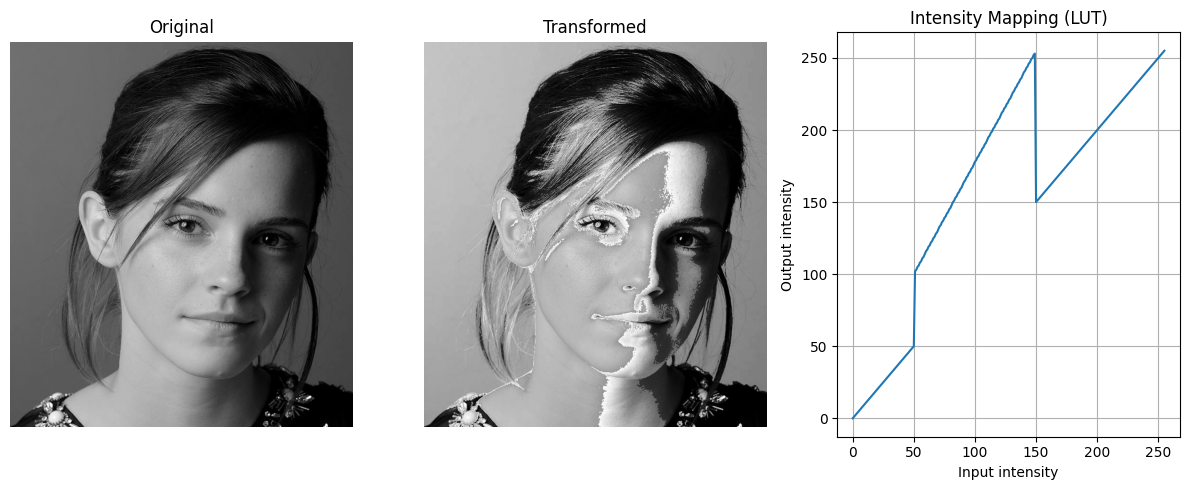

Saved: transformed.png


In [4]:
#plot images

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.title("Transformed")
plt.axis('off')

plt.subplot(1,3,3)
plt.plot(np.arange(256), lut)
plt.title("Intensity Mapping (LUT)")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save result
cv.imwrite("transformed.png", out)
print("Saved:", "transformed.png")

# Question 2